Import Required Libraries

In [ ]:
import re
import nltk
from nltk import word_tokenize, FreqDist
import pandas as pd
import csv
!pip3 install emoji
!pip3 install sentence_transformers
import emoji
nltk.download('all')
from nltk.corpus import stopwords
# from nltk.tokenize import TweetTokenizer
# w_tokenizer = TweetTokenizer()
from collections import Counter
import numpy as np
stop_words = set(stopwords.words('english'))
!pip3 install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
import pandas as pd
!pip install ftfy
import ftfy
from textblob import TextBlob
!pip install ngrams
from ngrams import*
stop_words = set(stopwords.words('english'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 15.4 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=4dbcb5219217ff111fc5ea94180f4d3795a69b096de4786b1ae5736d5657e97d
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.3 MB/s 
     |████████████████████████████████| 5.5 MB 58.5 MB/s 
     |████████████████████████████████| 1.3 MB 65.7 MB/s 
     |████████████████████████████████| 182 kB 70.3 MB/s 
     |████████████████████████████████| 7.6 MB 55.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2571b3450d357d01142f42d301f0d170730666d8a06e537c6af8f6954f2

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 27.5 MB/s 


Functions to Fix broken text, Remove Reserved Words

In [ ]:
def fix_broken_text(tweet):
  return ftfy.fix_text(tweet)
# function to replace sequence of repeated characters by two 
def fix_repeated_characters(tweet):
  return re.sub("(.)\\1{3,}", "\\1\\1",tweet)
# function to remove reserved words from tweet
def remove_twitter_reserved_words(tweet):
  return re.sub(r'(rt|fav|via)',' ',tweet)
def remove_blank_spaces(tweet):
  return re.sub(r'\s{2,}|\t',' ',tweet)

Spell Correction and Hashtag Segmentation

In [ ]:
# !pip3 install ekphrasis
from ekphrasis.classes.segmenter import Segmenter
from ekphrasis.classes.spellcorrect import SpellCorrector
sp = SpellCorrector(corpus="english") 
seg_tw = Segmenter(corpus="twitter")
from ekphrasis.classes.tokenizer import SocialTokenizer
social_tokenizer = SocialTokenizer(lowercase=True).tokenize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.9 MB/s 
     |████████████████████████████████| 45 kB 5.0 MB/s 
Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading english - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/english/counts_1grams.txt
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in
/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


In [ ]:
#Import File
df = pd.read_csv("tweets_11042022_L7D.csv",index_col=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,4,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(df)

200891

Considering Likes and Retweets>0

In [ ]:
df=df.rename(columns={"TEXT": "content"})
df.loc[df['LIKES'] == '[]', 'LIKES'] = 0.0
df['content']=df['content'].astype(str)
df['RETWEET']=df['RETWEET'].astype(float)
df['LIKES']=df['LIKES'].astype(float)
df1=df[(df['RETWEET']>0) | (df['LIKES']>0)]

In [ ]:
df1=df1.reset_index(drop=True)

In [ ]:
df.columns

Index(['ID', 'CREATED', 'AUTHOR', 'CONVERSATION ID', 'TEXT', 'RETWEET',
       'LIKES', 'QUOTE COUNT', 'REPLY COUNT', 'REFERENCED TWEETS',
       'REFERENCED TWEETS IDS', 'URL', 'EXPANDED URL', 'HASHTAGS', 'MENTIONS',
       'ATTACHMENTS', 'REPLY_SETTINGS'],
      dtype='object')

In [ ]:
df1.head()


,ID,CREATED,AUTHOR,CONVERSATION ID,content,RETWEET,LIKES,QUOTE COUNT,REPLY COUNT,REFERENCED TWEETS,...,mentions,link,clean,emojis,num_mentions,num_hashtags,num_links,len,num_stop,tokenize
0,1586508155499970560,2022-10-29 23:59:54+00:00,1.534416e+18,1.586415e+18,@randomjoonie Sexy Nukim\n\nI vote #KimNamjoon...,1.0,0.0,0.0,0.0,[<ReferencedTweet id=1586414625255395328 type=...,...,"[randomjoonie, BTS_twt]",[],sexy nukim vote kim namjoon for netizens repo ...,0,2,5,0,105,6,"[sexy, nukim, vote, kim, namjoon, for, netizen..."
1,1586508155122749440,2022-10-29 23:59:54+00:00,3.280238e+08,1.586493e+18,"@PJMLATAM_ @BTS_twt Jimin , de carita angelica...",11.0,8.0,0.0,0.0,[<ReferencedTweet id=1586493078864437248 type=...,...,"[PJMLATAM_, BTS_twt, BTS_twt]",[],jimin carita angelica keep hyping and streamin...,0,3,4,0,126,7,"[jimin, carita, angelica, keep, hyping, and, s..."
2,1586508138663976960,2022-10-29 23:59:50+00:00,4.817517e+09,1.586508e+18,11. I vote #BTS as #TheGroup of the year at th...,1.0,0.0,0.0,0.0,NaN,...,[],[t],vote bts the group the year the pcas,0,0,3,1,53,7,"[vote, bts, the, group, the, year, the, pcas]"
3,1586508132725182464,2022-10-29 23:59:49+00:00,1.310117e+18,1.586482e+18,@WeStreamBTS @Moonlight875_7 @BTS_twt I'm voti...,1.0,1.0,0.0,0.0,[<ReferencedTweet id=1586481971559030784 type=...,...,"[WeStreamBTS, Moonlight875_7, BTS_twt]",[],voting for bts for orite pop duo group the amas,0,3,1,0,61,5,"[voting, for, bts, for, orite, pop, duo, group..."
4,1586508131064250373,2022-10-29 23:59:48+00:00,1.438568e+18,1.586405e+18,@archiveforJKboy @BTS_twt Sooo pretty #Jungkoo...,0.0,1.0,0.0,0.0,[<ReferencedTweet id=1586405263887978496 type=...,...,"[archiveforJKboy, BTS_twt, BTS_twt]",[],sooo pretty jungkook bts,0,3,2,0,28,0,"[sooo, pretty, jungkook, bts]"


Extracting hashtags and Mentions

In [ ]:
df1['hashtag'] = df1['content'].apply(lambda x: re.findall(r"#(\w+)", x))
df1['mentions'] = df1['content'].apply(lambda x: re.findall(r"@(\w+)", x))
df1['link'] = df1['content'].apply(lambda x: re.findall(r"https://(\w+)", x))

Removing links, mentions

In [ ]:
#remove links
df1['clean'] = df1['content'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df1['clean'] = df1['clean'].replace(r'@(\w+)', '', regex=True) 
df1['clean'] = df1['clean'].replace(r'#', '', regex=True) 

Functions to Count Emojis and Stopwords

In [ ]:
def count_emojis(text):
  count=0
  # text=text.split()
  for i in text:
    if emoji.is_emoji(i):
      count+=1
      # print(i)
  return(count)

In [ ]:
def count_stopwords(text):
  count=0
  text=text.split()
  for i in text:
    if i in stop_words:
      count+=1
  return(count)

In [ ]:
df1['emojis']=df1.clean.apply(count_emojis)
df1['clean']=df1.clean.apply(emoji.replace_emoji)

Adding new features for mentions, hashtags and links

In [ ]:
df1['num_mentions']=df1.mentions.apply(len)
df1['num_hashtags']=df1.hashtag.apply(len)
df1['num_links']=df1.link.apply(len)

In [ ]:
df1['clean']=df1.clean.str.lower()
df1['clean']=df1['clean'].replace(r'[^\w\s]', '', regex=True)
df1['clean']=df1.clean.apply(fix_broken_text)
df1['clean']=df1.clean.apply(fix_repeated_characters)
df1['clean']=df1.clean.apply(remove_twitter_reserved_words)
# df1['clean']=df1.clean.str.strip()
df1['clean'] = df1['clean'].str.replace("[^a-zA-Z#]", " ",regex=True)
df1['clean']=df1.clean.apply(remove_blank_spaces)


In [ ]:
df1['clean'] = df1.clean.apply(seg_tw.segment)
df1['len']=df1.clean.apply(len)
df1['num_stop'] = df1.clean.apply(count_stopwords)
df1['clean'] = df1['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [ ]:
df1['tokenize'] = df1.clean.apply(social_tokenizer)


In [ ]:
df1['tokenize1']=df1.tokenize.apply(lambda x:list(map(sp.correct,x)))


Get POS Tags

In [ ]:
# df1['clean']=df1.clean.apply(w_tokenizer.tokenize)
# df1['clean'] = df1['clean'].apply(lambda x: [item for item in x if item not in stop_words])
df1['pos']=df1.tokenize1.apply(nltk.pos_tag)

In [ ]:
df1['pos_dict']=df1.pos.apply(lambda x:Counter(tag for word,tag in x))
# counts = 


In [ ]:
df1 = df1.join(pd.json_normalize(df1.pos_dict))
df1=df1.fillna(0)

Getting POS tags whose 75th percintile >=1

In [ ]:
df2=df1[['JJ', 'NN',
       'VBD', 'RB', 'IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'MD',
       'WDT', 'VBZ', 'RBR', 'CD', 'VBN', 'PRP$', 'WRB', 'WP', 'PDT', 'JJR',
       'EX', 'RBS', 'JJS', 'RP', 'NNP', 'FW', 'NNPS', 'UH', 'WP$']]
a = df2.values
q1 = np.quantile(a, q=0.25, axis=0)
q2 = np.quantile(a, q=0.75, axis=0)

mask = [q2>=1]

# df2.iloc[2]

In [ ]:
df2.columns[ mask]
df2=df1[['clean','content','tokenize1','ID','AUTHOR','RETWEET','LIKES','QUOTE COUNT','REPLY COUNT','emojis','len','num_mentions', 'num_hashtags', 'num_links','JJ', 'NN', 'VBD', 'RB', 'IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP',
       'VBP', 'VBZ', 'VBN']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['JJ', 'NN', 'VBD', 'RB', 'IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP',
       'VBP', 'VBZ', 'VBN'],
      dtype='object')

In [ ]:
df2=df2.reset_index(drop=True)

In [ ]:
len(df1)

6531

In [ ]:
df2['clean_sentence']=df2.tokenize1.str.join(' ')
df2['clean_sentence']=df2['clean_sentence'].astype(str).str.replace('\d+', '')
# df2['len']=df2.tokenize1.apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Sentiment Analysis

In [ ]:
df2['sentiment'] = [sid_obj.polarity_scores(x)['compound'] for x in df2['clean_sentence']]

import SBERT model to find similar pair of tweets

In [ ]:
from sentence_transformers import SentenceTransformer,util
model=SentenceTransformer('all-MiniLM-L6-v2')


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# emb1=model.encode(df1.loc[1]['clean_sentence'])

In [ ]:
len(emb1)

384

Encoding the sentences

In [ ]:
emb2=model.encode(df1.loc[2]['clean_sentence'])

In [ ]:
util.cos_sim(emb1,emb2)

tensor([[0.1315]])

Dropping Duplicate tweets

In [ ]:
df_para = df2.drop_duplicates(subset='clean_sentence', keep="first")
df_para=df_para.reset_index(drop=True)

Getting Similar pair of tweets

In [ ]:
paraphrases=util.paraphrase_mining(model,df_para['clean_sentence'])

In [ ]:
paraphrase_df=pd.DataFrame(columns=['scores','sentence1','sentence2','index1','index2'])

Extracting tweets whose score>.8

In [ ]:
for paraphrase in paraphrases:
  score,i,j=paraphrase
  if score>.8:
    paraphrase_df=paraphrase_df.append({'scores':score,'sentence1':df2.loc[i]['clean_sentence'],'sentence2':df2.loc[j]['clean_sentence'],'index1':i,'index2':j},ignore_index=True)
  # print(score,i,j,df2.loc[i]['clean_sentence'],df2.loc[j]['clean_sentence'])

Saving Final Dataframe of Semantic Features

In [ ]:
df2.to_csv('semantic_features_7k.csv')

Saving Final Dataframe of Similar tweets

In [ ]:
paraphrase_df.to_csv('paraphrases_7k.csv')

## EDA and Causal Diagram

In [ ]:
df1.describe()

,number_of_likes,emojis,num_mentions,num_hashtags,num_links,num_stop,len,sentiment
count,45813.000000,45813.000000,45813.000000,45813.000000,45813.000000,45813.000000,45813.000000,45813.000000
mean,9053.517146,0.276668,0.543317,0.493135,0.483946,4.732259,12.600943,0.263995
std,17892.945053,1.055024,0.796878,0.708912,0.670919,3.321373,6.301403,0.398744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.951700
25%,890.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,0.000000
50%,2459.000000,0.000000,0.000000,0.000000,0.000000,4.000000,13.000000,0.273200
75%,9466.000000,0.000000,1.000000,1.000000,1.000000,7.000000,17.000000,0.602700
max,429159.000000,67.000000,10.000000,8.000000,4.000000,23.000000,34.000000,0.994800


In [ ]:
!pip install causal-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 5.0 MB/s 


In [ ]:
from IPython.display import Image,display
def view_pydot(pdot):
  plt=Image(pdot.create_png())
  display(plt)

In [ ]:
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

In [ ]:
G=fci(df1.to_numpy())

Starting Fast Adjacency Search.


  0%|          | 0/8 [00:00<?, ?it/s]

Finishing Fast Adjacency Search.
X3 --> X1
X7 --> X1
X8 --> X1
X6 --> X4
X7 --> X4


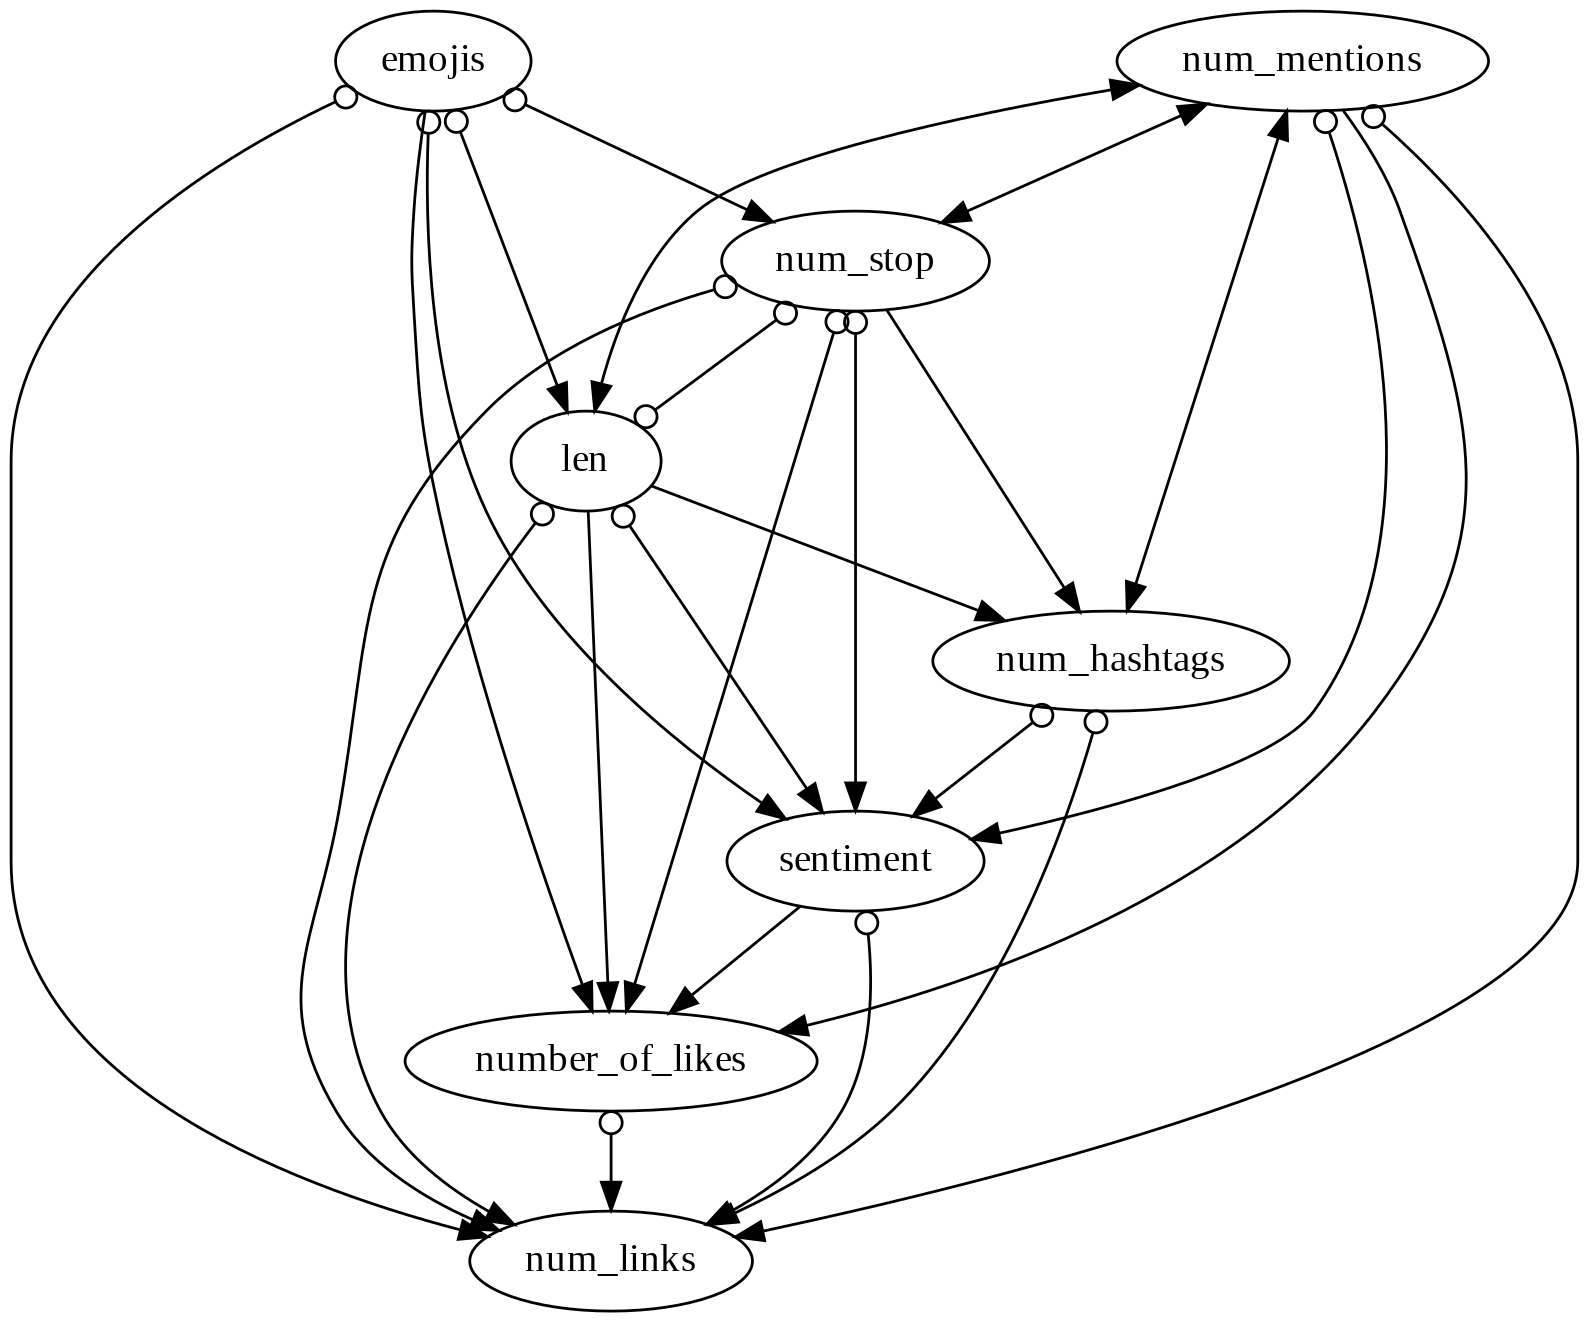

In [ ]:
dot=GraphUtils.to_pydot(G[0],labels=df1.columns)
view_pydot(dot)

In [ ]:
# df1.rename(columns={"num_links":"Li","number_of_likes":"Y","emojis":"E",'num_mentions':"@","num_hashtags":"#",'num_stop':"S","len":"L","sentiment":"S"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.head()

,Y,E,@,#,Li,S,L,S
0,7900,0,0,1,1,1,4,0.0000
1,3689,0,1,0,1,8,14,0.6801
2,10341,0,0,0,1,0,2,0.0000
3,10774,2,0,0,1,2,3,0.0000
4,17620,5,0,0,1,4,6,0.0000


In [ ]:
df1.columns

Index(['number_of_likes', 'emojis', 'num_mentions', 'num_hashtags',
       'num_links', 'num_stop', 'len', 'sentiment'],
      dtype='object')

  0%|          | 0/8 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
5 dep 1 | () with p-value 0.000000

5 dep 2 | () with p-value 0.000031

5 dep 3 | () with p-value 0.000000

5 dep 4 | () with p-value 0.000000

5 dep 6 | () with p-value 0.000000

5 dep 7 | () with p-value 0.000000

6 dep 0 | () with p-value 0.000000

6 dep 1 | () with p-value 0.000000

6 dep 2 | () with p-value 0.000000

6 dep 3 | () with p-value 0.000000

6 dep 4 | () with p-value 0.000000

6 dep 5 | () with p-value 0.000000

6 dep 7 | () with p-value 0.000000

7 dep 0 | () with p-value 0.000000

7 dep 1 | () with p-value 0.000002

7 dep 2 | () with p-value 0.000000

7 dep 3 | () with p-value 0.000002

7 dep 4 | () with p-value 0.000000

7 dep 5 | () with p-value 0.000000

7 dep 6 | () with p-value 0.000000

0 dep 1 | (2,) with p-value 0.000000

0 dep 1 | (3,) with p-value 0.000000

0 dep 1 | (4,) with p-value 0.000000

0 dep 1 | (5,) with p-value 0.000000

0 dep 1 | (6,) with p-value 0.000000

0 dep 1 | (7,) with p-value 0.000000

0

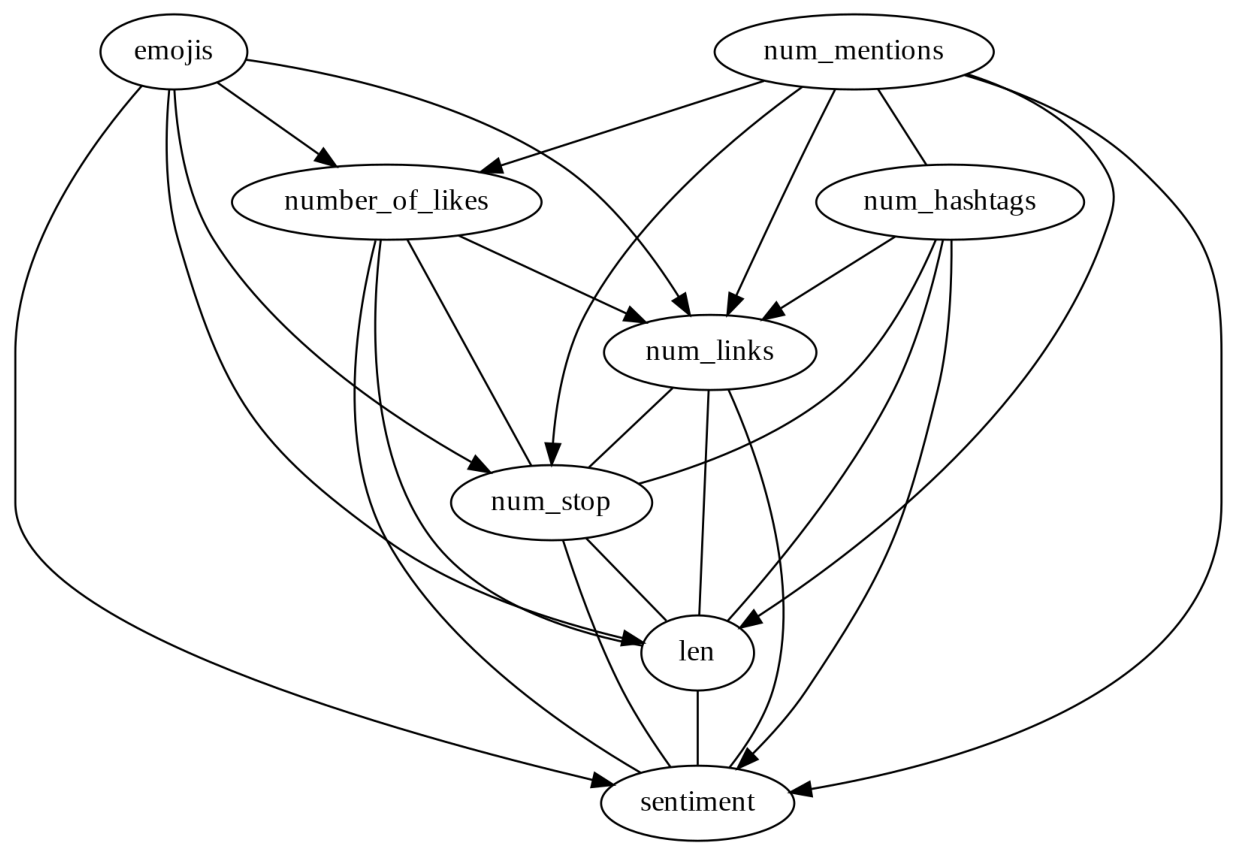

In [ ]:
from causallearn.search.ConstraintBased.PC import pc
cg=pc(df1.to_numpy(),verbose=True)
cg.draw_pydot_graph(labels=df1.columns)

In [ ]:
cg

In [ ]:
GraphUtils.to_pydot(cg,labels=df1.columns)

AttributeError: ignored